/tmp/ipykernel_2226710/1212824053.py:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], cmap='viridis', label=num_to_name[classes[i]])


<Figure size 640x480 with 0 Axes>

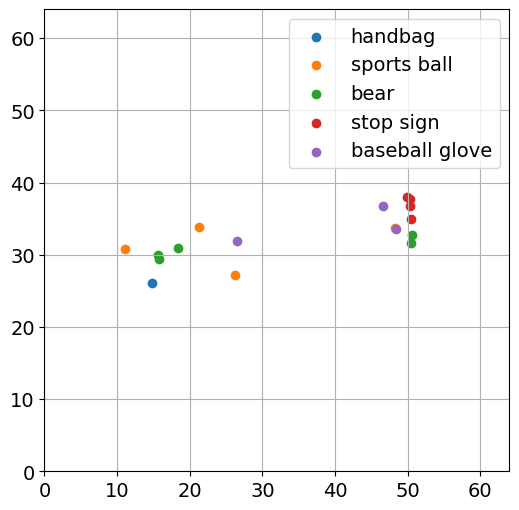

In [13]:
import numpy as np
import json
import matplotlib.pyplot as plt


### 2. store the centorid of each annotations
dict_bbox = {}
dict_label = {}

for i in range(20000):
    dict_bbox[i] = []
    dict_label[i] = []

for spilt in ['train', 'val', 'test']:
    mode = '1_category_5_class_npy'
    name = spilt + '_for_1_category_5_class_npy' + '.json'

    base_path = '/nfs/data/yuanhaoban/ODFN/version_2/'
    path = base_path + spilt + '/annotations/' + name
    
    with open(path, 'r') as f:
        data = json.load(f)

    annotatinos = data['annotations']

    for ann in annotatinos:
        # dict_bbox[ann['image_id']].append([ann['bbox'][0] + ann['bbox'][2]/2, ann['bbox'][1] + ann['bbox'][3]/2])
        dict_bbox[ann['image_id']].append(ann['bbox'])
        id = ann['id']
        class_label = id // 10000000
        dict_label[ann['image_id']].append(class_label)

# num = 8
# num = 2000
# num = 4000
# num = 5008
# num = 5093
num = 5104
value = dict_bbox[num]
labels_true = dict_label[num]


# 假设value是已经定义的四维向量数组
value = np.array(value)
value = value.reshape(-1, 4)
new_value = np.zeros((value.shape[0], 2))
new_value[:, 0] = value[:, 0]/2 + value[:, 2]/2
new_value[:, 1] = value[:, 1]/2 + value[:, 3]/2
value = new_value

# plt.clf()
# plt.figure(figsize=(10,10))
# plt.xlim(0, 64)
# plt.ylim(0, 64)
# plt.grid()
# plt.scatter(value[:, 0], value[:, 1], c=labels_true, cmap='viridis')
# plt.legend(title="Classes")
# plt.savefig('cluster_label.png')


import numpy as np

classes = [26, 32, 21, 11, 35]
num_to_name = {26:'handbag',32:'sports ball',21:"bear",11:'stop sign',35:'baseball glove'}
class_data = []
for c in classes:
    list_ = []
    for i, label in enumerate(labels_true):
        if label == c:
            list_.append(value[i])
    list_ = np.array(list_)
    class_data.append(list_)

plt.clf()
plt.figure(figsize=(6,6))
plt.xlim(0, 64)
plt.ylim(0, 64)
plt.grid()

# 为每个类别创建一个散点图
for i, data in enumerate(class_data):
    plt.scatter(data[:, 0], data[:, 1], cmap='viridis', label=num_to_name[classes[i]])

plt.legend(title="Classes")
# set legend font size
plt.legend(prop={'size': 14})
# set axis font size
plt.tick_params(labelsize=14)
plt.savefig('cluster_label.png')